## Exercise 1

Assume $f(x, y | z) = f(x|z) f(y|z)$. Then
$$\begin{split}
f(x|y,z) 
&= \frac{f(x,y,z)}{f(y, z)} \\
&= \frac{f(x,y|z) f(z)}{f(y, z)} \\
&= \frac{f(x|z) f(y|z)}{f(y| z)} \\
&= f(x|z). \\
\end{split}$$

Now assume $f(x|y,z) = f(x|z)$. Then
$$\begin{split}
f(x,y|z) 
&= \frac{f(x,y,z)}{f(z)} \\
&= \frac{f(x|y,z) f(y, z)}{f(z)} \\
&= f(x|z) f(y|z).
\end{split}$$

## Exercise 2

The property $X \perp \!\!\! \perp Y | Z \implies Y \perp \!\!\! \perp X | Z$ is immediate from the symmetry of (17.1).

## Exercise 3

In [1]:
import numpy as np

In [2]:
p = np.array([
    [
        [0.405, 0.045],
        [0.045, 0.005],
    ],
    [
        [0.125, 0.125],
        [0.125, 0.125],
    ],
])

(a) The conditional distribution given $Z$ is:

In [3]:
cond_xy = p / np.sum(p, axis=(1, 2))
cond_xy

array([[[0.81, 0.09],
        [0.09, 0.01]],

       [[0.25, 0.25],
        [0.25, 0.25]]])

(b) We verify that $\mathbb{P}(X=x, Y=y|Z) = \mathbb{P}(X=x|Z) \mathbb{P}(Y=y|Z)$.

Calculate $\mathbb{P}(X=x|Z)$:

In [4]:
cond_x = np.sum(cond_xy, axis=2)
cond_x

array([[0.9, 0.1],
       [0.5, 0.5]])

Calculate $\mathbb{P}(Y=y|Z)$:

In [5]:
cond_y = np.sum(cond_xy, axis=1)
cond_y

array([[0.9, 0.1],
       [0.5, 0.5]])

Confirm that $\mathbb{P}(X=x, Y=y|Z) = \mathbb{P}(X=x|Z) \mathbb{P}(Y=y|Z)$.

In [6]:
res = np.einsum('ij,ik->ijk', cond_x, cond_y)
res

array([[[0.81, 0.09],
        [0.09, 0.01]],

       [[0.25, 0.25],
        [0.25, 0.25]]])

In [7]:
np.testing.assert_allclose(res, cond_xy)

(c) Marginal distribution of $X$:

In [8]:
p_x = np.sum(p, axis=(0, 2))
p_x

array([0.7, 0.3])

Marginal distribution of $Y$:

In [9]:
p_y = np.sum(p, axis=(0, 1))
p_y

array([0.7, 0.3])

(d) Calculate the joint distribution $\mathbb{P}(X=x, Y=y)$:

In [10]:
np.sum(p, axis=0)

array([[0.53, 0.17],
       [0.17, 0.13]])

Check that $\mathbb{P}(X=x, Y=y) \neq \mathbb{P}(X=x) \mathbb{P}(Y=y)$:

In [11]:
np.einsum('j,k->jk', p_x, p_y)

array([[0.49, 0.21],
       [0.21, 0.09]])

## Exercise 4

In the first DAG, $\pi_Z = \{Y\}$, so by Theorem 17.6, $Z \perp \!\!\! \perp X | Y$, and by properties of conditional expectation $X \perp \!\!\! \perp Z | Y$.

In the second DAG, $\pi_X = \{Y\}$, so by Theorem 17.6, $X \perp \!\!\! \perp Z | Y$.

In the third DAG, $\pi_X = \{Y\}$, so by Theorem 17.6, $X \perp \!\!\! \perp Z | Y$.

## Exercise 5

We have $\pi_X = \emptyset$, so by Theorem 17.6, $X \perp \!\!\! \perp Z$.

$X$ and $Z$ are $d$-connected given $Y$, so by Theorem 17.10, $X$ and $Y$ are dependent given $Y$.

## Exercise 6

In [12]:
import scipy.stats as stats

In [13]:
rng = np.random.default_rng(12345)

Generate random vectors corresponding to the DAG:

In [14]:
p_x = np.array([0.6, 0.4])
p_y = np.array([
    [0.7, 0.3],
    [0.4, 0.6],
])
p_z = np.array([
    [0.1, 0.3, 0.6],
    [0.7, 0.1, 0.2],
])

Calculate joint probabilities:

In [15]:
def theta(p_x, p_y, p_z):
    def gen():
        for r in range(2):
            for s in range(2):
                for t in range(3):
                    yield p_x[r] * p_y[r, s] * p_z[s, t]
    return np.fromiter(gen(), float)

In [16]:
theta(p_x, p_y, p_z)

array([0.042, 0.126, 0.252, 0.126, 0.018, 0.036, 0.016, 0.048, 0.096,
       0.168, 0.024, 0.048])

In [17]:
n = 1000

In [18]:
x = stats.bernoulli.rvs(p=p_x[1], size=n, random_state=rng)
y = stats.bernoulli.rvs(p=p_y[x, 1], size=n, random_state=rng)
z = np.fromiter((rng.choice(3, size=1, p=p_z[v])[0] for v in y), int)
v = np.stack([x, y, z], axis=1)

The likelihood of one observation is given by
$$\begin{split}
f(v_i) = f(x_i) f(y_i|x_i) f(z_i|y_i),
\end{split}$$
where
$$f(x_i) = p_{x=1}^{x_i} (1 - p_{x=1})^{1 - x_i},$$
$$f(y_i|x_i) = \begin{cases}
p_{y=1|x=0}^{y_i} (1 - p_{y=1|x=0})^{1 - y_i}, &\text{ if } x_i = 0 \\
p_{y=1|x=1}^{y_i} (1 - p_{y=1|x=1})^{1 - y_i}, &\text{ if } x_i = 1 \\
\end{cases}$$
$$f(z_i|y_i) = \begin{cases}
p_{z=0|y=0}, &\text{ if } z_i = 0, y_i = 0 \\
p_{z=1|y=0}, &\text{ if } z_i = 1, y_i = 0 \\
1 - p_{z=0|y=0} - p_{z=1|y=0}, &\text{ if } z_i = 2, y_i = 0 \\
p_{z=0|y=1}, &\text{ if } z_i = 0, y_i = 1 \\
p_{z=1|y=1}, &\text{ if } z_i = 1, y_i = 1 \\
1 - p_{z=0|y=1} - p_{z=1|y=1}, &\text{ if } z_i = 2, y_i = 1 \\
\end{cases}$$
The log-likelihood for the sample is
$$l = \sum_{i=1}^n \log f(x_i) + \sum_{i=1}^n \log f(y_i | x_i) + \sum_{i=1}^n \log f(z_i | y_i).$$
Note that $p_{x=1}$ is only present in the terms $f(x_i)$, so we can find an estimator by maximising the log-likelihood
$$l_1 = \sum_{i=1}^n \log f(x_i) = \log p_{x=1} \sum_{i=1}^n x_i + \log(1 - p_{x=1}) \sum_{i=1}^n (1-x_i).$$
Taking the derivative by $p_{x=1}$ and setting it to zero yields
$$\hat{p}_{x=1} = \frac{1}{n} \sum_{i=1}^n x_i.$$
Similarly, $p_{y=1|x=0}$ is only involved in the term $f(y_i|x_i)$ when $x_i = 0$, so we obtain
$$\hat{p}_{y=1|x=0} = \frac{\sum_{i=1}^n y_i (1 - x_i)}{\sum_{i=1}^n (1 - x_i)},$$
and
$$\hat{p}_{y=1|x=1} = \frac{\sum_{i=1}^n y_i x_i}{\sum_{i=1}^n x_i}.$$
Analogously,
$$\begin{split}
\hat{p}_{z=0|y=0} &= \frac{\sum_{i=1}^n \mathbb{1}_{z_i = 0} \mathbb{1}_{y_i = 0}}{\sum_{i=1}^n \mathbb{1}_{y_i = 0}}, \\
\hat{p}_{z=1|y=0} &= \frac{\sum_{i=1}^n \mathbb{1}_{z_i = 1} \mathbb{1}_{y_i = 0}}{\sum_{i=1}^n \mathbb{1}_{y_i = 0}}, \\
\hat{p}_{z=0|y=1} &= \frac{\sum_{i=1}^n \mathbb{1}_{z_i = 0} \mathbb{1}_{y_i = 1}}{\sum_{i=1}^n \mathbb{1}_{y_i = 1}}, \\
\hat{p}_{z=1|y=1} &= \frac{\sum_{i=1}^n \mathbb{1}_{z_i = 1} \mathbb{1}_{y_i = 1}}{\sum_{i=1}^n \mathbb{1}_{y_i = 1}}. \\
\end{split}$$

In [19]:
def loglik_estimates(v):
    n = v.shape[0]
    
    p_x1_hat = np.sum(v[:, 0]) / n
    p_y1x0_hat = np.sum(v[:, 1] * (1 - v[:, 0])) / np.sum(1 - v[:, 0])
    p_y1x1_hat = np.sum(v[:, 1] * v[:, 0]) / np.sum(v[:, 0])
    p_z0y0_hat = np.sum((v[:, 1] == 0) & (v[:, 2] == 0)) / np.sum(v[:, 1] == 0)
    p_z1y0_hat = np.sum((v[:, 1] == 0) & (v[:, 2] == 1)) / np.sum(v[:, 1] == 0)
    p_z0y1_hat = np.sum((v[:, 1] == 1) & (v[:, 2] == 0)) / np.sum(v[:, 1] == 1)
    p_z1y1_hat = np.sum((v[:, 1] == 1) & (v[:, 2] == 1)) / np.sum(v[:, 1] == 1)

    p_x = np.array([1 - p_x1_hat, p_x1_hat])
    p_y = np.array([
        [1 - p_y1x0_hat, p_y1x0_hat],
        [1 - p_y1x1_hat, p_y1x1_hat],
    ])
    p_z = np.array([
        [p_z0y0_hat, p_z1y0_hat, 1 - p_z0y0_hat - p_z1y0_hat],
        [p_z0y1_hat, p_z1y1_hat, 1 - p_z0y1_hat - p_z1y1_hat],
    ])

    return theta(p_x, p_y, p_z)

In [20]:
theta_hat = loglik_estimates(v)
theta_hat

array([0.0413222 , 0.15643406, 0.24424374, 0.11985037, 0.01864339,
       0.03950623, 0.0146778 , 0.05556594, 0.08675626, 0.15014963,
       0.02335661, 0.04949377])

The estimates are close to the true values:

In [21]:
theta(p_x, p_y, p_z)

array([0.042, 0.126, 0.252, 0.126, 0.018, 0.036, 0.016, 0.048, 0.096,
       0.168, 0.024, 0.048])

In [22]:
n_resamples = 1000

In [23]:
theta_boot = np.stack([loglik_estimates(v[rng.choice(v.shape[0], size=v.shape[0])]) for _ in range(n_resamples)])

The standard errors are:

In [24]:
np.std(theta_boot, axis=0, ddof=1)

array([0.00546709, 0.00998056, 0.0118261 , 0.00897292, 0.00294579,
       0.00474853, 0.00210356, 0.00481993, 0.00708538, 0.01050407,
       0.00361716, 0.00560527])

The confidence intervals are:

In [25]:
alpha = 0.05

In [26]:
(2 * theta_hat - np.quantile(theta_boot, [1 - alpha / 2, alpha / 2], axis=0)).T

array([[0.02960101, 0.05090222],
       [0.13819674, 0.17650047],
       [0.22084086, 0.26651382],
       [0.1018823 , 0.13664684],
       [0.01282144, 0.0241617 ],
       [0.02986529, 0.04884474],
       [0.01029519, 0.01852191],
       [0.04560474, 0.06478084],
       [0.07132317, 0.09937628],
       [0.12870113, 0.169635  ],
       [0.01584382, 0.03030297],
       [0.03800526, 0.06009284]])

## Exercise 7

(a) The factorisation of the joint density is
$$f(v) = f(z_1) f(z_2) f(z_3) f(z_4) f(x) f(y_1|x,z_1) f(y_2|x,z_2) f(y_3|x,z_3) f(y_4|x,z_4).$$

(b) Since $\pi_{Z_j} = \emptyset$, we have by Theorem 17.6, $Z_j \perp \!\!\! \perp \{X, Z_2, Z_3, Z_4, Y_2, Y_3, Y_4\}$ and in particular $Z_j \perp \!\!\! \perp X$.

## Exercise 8

(a) We have
$$\begin{split}
\mathbb{P}(Z=z|Y=y) 
&= \frac{\mathbb{P}(Z=z,Y=y)}{\mathbb{P}(Y=y)} \\
&= \frac{\mathbb{P}(Z=z,Y=y,X=0) + \mathbb{P}(Z=z,Y=y,X=1)}{\mathbb{P}(Y=y,X=0) + \mathbb{P}(Y=y,X=1)} \\
&= \frac{\mathbb{P}(Z=z|Y=y,X=0) \mathbb{P}(Y=y|X=0) \mathbb{P}(X=0)  + \mathbb{P}(Z=z|Y=y,X=1)\mathbb{P}(Y=y|X=1)\mathbb{P}(X=1)}{\mathbb{P}(Y=y|X=0)\mathbb{P}(X=0) + \mathbb{P}(Y=y|X=1)\mathbb{P}(X=1)}, \\
\end{split}$$
where
$$\begin{split}
\mathbb{P}(X=0) &= \mathbb{P}(X=1) = \frac{1}{2}, \\
\mathbb{P}(Y=y|X=0) &= \left(\frac{e^{-2}}{1 + e^{-2}} \right)^y \left(\frac{1}{1 + e^{-2}} \right)^{1-y} = \frac{e^{-2y}}{1 + e^{-2}}, \\
\mathbb{P}(Y=y|X=1) &= \left(\frac{e^{2}}{1 + e^{2}} \right)^y \left(\frac{1}{1 + e^{2}} \right)^{1-y} = \frac{e^{2y}}{1 + e^{2}}, \\
\mathbb{P}(Z=z|Y=y,X=0) &= \left(\frac{e^{2y-2}}{1 + e^{2y-2}} \right)^z \left(\frac{1}{1 + e^{2y-2}} \right)^{1-z} = \frac{e^{(2y-2)z}}{1 + e^{2y-2}}, \\
\mathbb{P}(Z=z|Y=y,X=1) &= \left(\frac{e^{2y}}{1 + e^{2y}} \right)^z \left(\frac{1}{1 + e^{2y}} \right)^{1-z} = \frac{e^{2yz}}{1 + e^{2y}}, \\
\end{split}$$

In [27]:
def p_y_x(y, x):
    u = np.exp(4 * x - 2)
    return u ** y / (1 + u)

In [28]:
def p_z_xy(z, x, y):
    u = np.exp(2 * (x + y) - 2)
    return u ** z / (1 + u)

In [29]:
def p_z_y(z, y):
    return (p_z_xy(z, 0, y) * p_y_x(y, 0) + p_z_xy(z, 1, y) * p_y_x(y, 1)) / (p_y_x(y, 0) + p_y_x(y, 1))        

In [30]:
p_z_y(1, 1)

np.float64(0.8354049535854347)

(b)

In [31]:
import matplotlib.pyplot as plt

In [32]:
n = 500_000

In [33]:
x = stats.bernoulli.rvs(p=0.5, size=n, random_state=rng)
y = stats.bernoulli.rvs(p=np.array([p_y_x(1, 0), p_y_x(1, 1)])[x], size=n, random_state=rng)
pz = np.array([
    [p_z_xy(1, 0, 0), p_z_xy(1, 0, 1)],
    [p_z_xy(1, 1, 0), p_z_xy(1, 1, 1)],
])
z = stats.bernoulli.rvs(p=pz[x, y], size=n, random_state=rng)

The estimate of $\mathbb{P}(Z=1|Y=1)$:

In [34]:
np.sum((z == 1) & (y == 1)) / np.sum(y == 1)

np.float64(0.834152088824986)

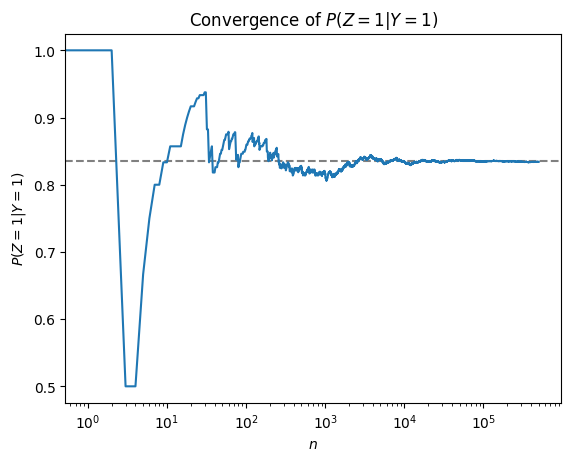

In [35]:
fig, ax = plt.subplots()
ax.axhline(p_z_y(1, 1), linestyle='--', color='gray');
ax.plot(np.arange(n), np.cumsum((z == 1) & (y == 1)) / np.cumsum(y == 1));
ax.set_xscale('log');
ax.set_xlabel('$n$');
ax.set_ylabel('$P(Z=1|Y=1)$');
ax.set_title('Convergence of $P(Z=1|Y=1)$');

(c) The expression for $\mathbb{P}(Z = 1 | Y := y)$ is obtained by dropping the term $f(y|\pi_y)$:
$$\begin{split}
\mathbb{P}(Z=z|Y:=y) 
&= \mathbb{P}(Z=z|Y=y,X=0) \mathbb{P}(X=0)  + \mathbb{P}(Z=z|Y=y,X=1)\mathbb{P}(X=1), \\
\end{split}$$

In [36]:
def p_z_y_set(z, y):
    return (p_z_xy(z, 0, y) + p_z_xy(z, 1, y)) / 2

In [37]:
p_z_y_set(1, 1)

np.float64(0.6903985389889412)

(d)

In [38]:
x = stats.bernoulli.rvs(p=0.5, size=n, random_state=rng)
y = np.repeat(1, n)
z = stats.bernoulli.rvs(p=pz[x, y], size=n, random_state=rng)

The empirical estimate of $\mathbb{P}(Z=1|Y:=1)$:

In [39]:
np.sum((z == 1) & (y == 1)) / np.sum(y == 1)

np.float64(0.690414)

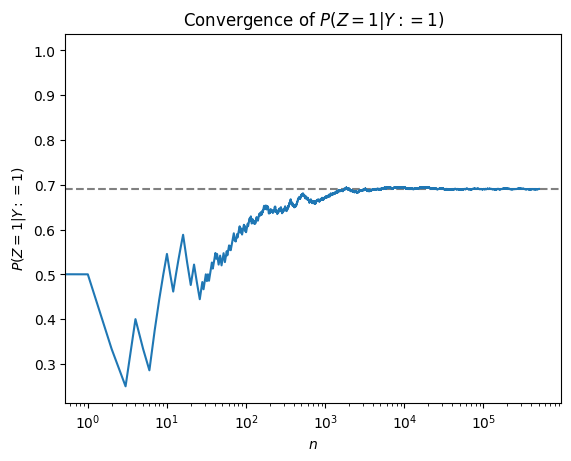

In [40]:
fig, ax = plt.subplots()
ax.axhline(p_z_y_set(1, 1), linestyle='--', color='gray');
ax.plot(np.arange(n), np.cumsum((z == 1) & (y == 1)) / np.cumsum(y == 1));
ax.set_xscale('log');
ax.set_xlabel('$n$');
ax.set_ylabel('$P(Z=1|Y:=1)$');
ax.set_title('Convergence of $P(Z=1|Y:=1)$');

## Exercise 9

(a) We have
$$\begin{split}
f(x,y,z) 
&= f(z|x,y) f(y|x) f(x) \\
&= \frac{1}{\sqrt{2\pi}} \exp\left\{-\frac{(z - \beta y - \gamma x)^2}{2}\right\} \frac{1}{\sqrt{2\pi}} \exp\left\{-\frac{(y - \alpha x)^2}{2}\right\} \frac{1}{\sqrt{2\pi}} \exp\left\{-\frac{x^2}{2}\right\} \\
&= \frac{1}{(2\pi)^{\frac{3}{2}}} \exp\left\{-\frac{1}{2}\left((z - \beta y - \gamma x)^2 + (y - \alpha x)^2 + x^2\right)\right\} \\
&= \frac{1}{(2\pi)^{\frac{3}{2}}} \exp\left\{-\frac{1}{2}\left(z^2 + \beta^2 y^2 + \gamma^2 x^2 - 2\beta y z - 2 \gamma x z + 2 \beta \gamma x y + y^2 - 2\alpha x y + \alpha^2 x^2 + x^2\right)\right\} \\
&= \frac{1}{(2\pi)^{\frac{3}{2}}} \exp\left\{-\frac{1}{2}\left(x^2 (1 + \alpha^2 + \gamma^2) + 2 xy (\beta \gamma - \alpha) -2 xz \gamma + y^2 (1 + \beta^2) - 2 y z \beta + z^2\right)\right\} \\
&= \frac{1}{(2\pi)^{\frac{3}{2}}} \exp\left\{-\frac{1}{2} \begin{pmatrix} x & y & z \end{pmatrix} \Sigma^{-1} \begin{pmatrix} x \\ y \\ z \end{pmatrix} \right\}, \\
\end{split}$$
where
$$\Sigma^{-1} = \begin{pmatrix}
1 + \alpha^2 + \gamma^2 & \beta \gamma - \alpha & -\gamma \\
\beta \gamma - \alpha & 1 + \beta^2 & -\beta \\
-\gamma & -\beta & 1 \\
\end{pmatrix}.$$
We can verify that $|\Sigma^{-1}| = 1$, so 
$$X, Y, Z \sim \text{Normal}\left(0, \Sigma\right),$$
where
$$\Sigma = \begin{pmatrix}
1 & \alpha & \alpha \beta + \gamma \\
\alpha & 1 + \alpha^2 & \beta + \alpha^2 \beta + \alpha \gamma \\
\alpha \beta + \gamma & \beta + \alpha^2 \beta + \alpha \gamma & 1 + \gamma^2 + \beta^2 + \alpha^2 \beta^2 + 2 \alpha \beta \gamma \\
\end{pmatrix}.$$

By Theorem 2.44, 
$$Y, Z \sim \text{Normal}(0, \Sigma_{YZ}),$$
where
$$\Sigma_{YZ} = \begin{pmatrix}
1 + \alpha^2 & \beta + \alpha^2 \beta + \alpha \gamma \\
\beta + \alpha^2 \beta + \alpha \gamma & 1 + \gamma^2 + \beta^2 + \alpha^2 \beta^2 + 2 \alpha \beta \gamma \\
\end{pmatrix}$$
and
$$Z|Y \sim \text{Normal}\left(\frac{\beta + \alpha^2 \beta + \alpha \gamma}{1+\alpha^2} y, 1 + \gamma^2 + \beta^2 + \alpha^2 \beta^2 + 2 \alpha \beta \gamma - \frac{(\beta + \alpha^2 \beta + \alpha \gamma)^2}{1 + \alpha^2}\right),$$
so
$$f(z|y) = \frac{1}{\sqrt{2\pi} \sigma_{Z|Y}} \exp\left\{ -\frac{(z - \mu_{Z|Y})^2}{2 \sigma_{Z|Y}^2} \right\},$$
where
$$\begin{split}
\mu_{Z|Y} &= \frac{\beta + \alpha^2 \beta + \alpha \gamma}{1+\alpha^2} y, \\
\sigma_{Z|Y}^2 &= 1 + \gamma^2 + \beta^2 + \alpha^2 \beta^2 + 2 \alpha \beta \gamma - \frac{(\beta + \alpha^2 \beta + \alpha \gamma)^2}{1 + \alpha^2}. \\
\end{split}$$

(b) We have
$$\begin{split}
f(x, z) &= f(z|x,y) f(x) \\
&= \frac{1}{\sqrt{2\pi}} \exp\left\{-\frac{(z - \beta y - \gamma x)^2}{2}\right\} \frac{1}{\sqrt{2\pi}} \exp\left\{-\frac{x^2}{2}\right\} \\
&= \frac{1}{2\pi} \exp\left\{-\frac{1}{2}\left( (z - \beta y - \gamma x)^2 + x^2\right)\right\} \\
&= \frac{1}{2\pi} \exp\left\{-\frac{1}{2}\left( (z - \beta y)^2 - 2 (z - \beta y) \gamma x + \gamma^2 x^2 + x^2\right)\right\} \\
&= \frac{1}{2\pi} \exp\left\{-\frac{1}{2}\left( x^2 (1 + \gamma^2) - 2 (z - \beta y) \gamma x + (z - \beta y)^2\right)\right\} \\
&= \frac{1}{2\pi} \exp\left\{-\frac{1}{2}\left( \begin{pmatrix} x & z - \beta y \end{pmatrix} \Sigma_{XZ}^{-1}  \begin{pmatrix} x \\ z - \beta y \end{pmatrix} \right)\right\}, \\
\end{split}$$
where
$$\Sigma_{XZ}^{-1} = \begin{pmatrix}
1 + \gamma^2 & -\gamma \\
-\gamma & 1 \\
\end{pmatrix},$$
so
$$\Sigma_{XZ} = \begin{pmatrix}
1  & \gamma \\
\gamma & 1 + \gamma^2 \\
\end{pmatrix}.$$
We can verify that $|\Sigma_{XZ}| = 1$, thus
$$X, Z \sim \text{Normal}\left( \begin{pmatrix} 0 \\ \beta y \end{pmatrix}, \Sigma_{XZ} \right).$$
The marginal is therefore
$$Z | Y:=y \sim \text{Normal}\left( \beta y, 1 + \gamma^2 \right),$$
so
$$f(z | Y := y) = \frac{1}{\sqrt{2\pi (1 + \gamma^2)}} \exp\left\{-\frac{(z - \beta y)^2}{2(1 + \gamma^2)}\right\}$$
and the expectation
$$\mathbb{E}[Z|Y:=y] = \beta y.$$

(c) The joint distribution of $(Y,Z)$ was found in (a). The correlation can be obtained immediately from $\Sigma_{YZ}$:
$$\rho = \frac{\beta + \alpha^2 \beta + \alpha \gamma}{\sqrt{ (1 + \alpha^2) (1 + \gamma^2 + \beta^2 + \alpha^2 \beta^2 + 2 \alpha \beta \gamma) }}.$$

(d) If $\beta = 0$, but $\alpha \neq 0$ and $\gamma \neq 0$, we have $\rho \neq 0$, so although $Y$ does not directly affect $Z$, we would detect a correlation.

Conversely, if for example $\alpha = \beta = 1$ and $\gamma = -2$, we have $\rho = 0$, although clearly $Y$ affects $Z$ in this case.

(e) We have
$$\begin{split}
f(x,y,z) 
&= f(z|x,y) f(y) f(x) \\
&= \frac{1}{\sqrt{2\pi}} \exp\left\{-\frac{(z - \beta y - \gamma x)^2}{2}\right\} \frac{1}{\sqrt{2\pi}} \exp\left\{-\frac{(y - \alpha)^2}{2}\right\} \frac{1}{\sqrt{2\pi}} \exp\left\{-\frac{x^2}{2}\right\} \\
&= \frac{1}{(2\pi)^{\frac{3}{2}}} \exp\left\{-\frac{1}{2}\left((z - \beta y - \gamma x)^2 + (y - \alpha)^2 + x^2\right)\right\} \\
&= \frac{1}{(2\pi)^{\frac{3}{2}}} \exp\left\{-\frac{1}{2}\left((z - \beta (y - \alpha) - \beta \alpha - \gamma x)^2 + (y - \alpha)^2 + x^2\right)\right\} \\
&= \frac{1}{(2\pi)^{\frac{3}{2}}} \exp\left\{-\frac{1}{2}\left(((z - \alpha \beta) - \beta (y - \alpha) - \gamma x)^2 + (y - \alpha)^2 + x^2\right)\right\} \\
&= \frac{1}{(2\pi)^{\frac{3}{2}}} \exp\left\{-\frac{1}{2}\left((z - \alpha \beta)^2 + \beta^2 (y - \alpha)^2 + \gamma^2 x^2 - 2 \beta (y - \alpha) (z - \alpha \beta)  - 2 \gamma x (z - \alpha \beta) + 2 \beta \gamma x (y - \alpha) + (y - \alpha)^2 + x^2\right)\right\} \\
&= \frac{1}{(2\pi)^{\frac{3}{2}}} \exp\left\{-\frac{1}{2}\left( (1 + \gamma^2) x^2 + 2 \beta \gamma x (y - \alpha) - 2 \gamma x (z - \alpha \beta) + (1 + \beta^2) (y - \alpha)^2 - 2 \beta (y - \alpha) (z - \alpha \beta) + (z - \alpha \beta)^2\right)\right\} \\
&= \frac{1}{(2\pi)^{\frac{3}{2}}} \exp\left\{-\frac{1}{2} \begin{pmatrix} x & y - \alpha & z - \alpha \beta \end{pmatrix} {\Sigma^*}^{-1}  \begin{pmatrix} x \\ y - \alpha \\ z - \alpha \beta \end{pmatrix}\right\}, \\
\end{split}$$
where
$${\Sigma^*}^{-1} = \begin{pmatrix}
1 + \gamma^2 & \beta \gamma & -\gamma \\
\beta \gamma & 1 + \beta^2 & -\beta \\
-\gamma & -\beta & 1 \\
\end{pmatrix}.$$
We can verify that $|{\Sigma^*}^{-1}|$, so
$$X, Y, Z \sim \text{Normal}\left(\begin{pmatrix} 0 \\ \alpha \\ \alpha \beta \end{pmatrix}, \Sigma^* \right),$$
where
$$\Sigma^* = \begin{pmatrix}
1 & 0 & \gamma \\
0 & 1 & \beta \\
\gamma & \beta & 1 + \beta^2 + \gamma^2 \\
\end{pmatrix}.$$
The joint distribution of $(Y,Z)$ in this case is
$$Y, Z \sim \text{Normal}\left( \begin{pmatrix} \alpha \\ \alpha \beta \end{pmatrix}, \begin{pmatrix} 1 & \beta \\ \beta & 1 + \beta^2 + \gamma^2 \end{pmatrix} \right),$$
so the correlation is
$$\rho = \frac{\beta}{\sqrt{1 + \beta^2 + \gamma^2}}.$$
We can see that $\rho = 0$ if and only if $\beta = 0$, i.e. if $Z$ is not affected by $Y$.